Navid Azadegan 

In [1]:
import pandas as pd
import numpy as np
import plotly
from datetime import datetime
pd.options.display.max_rows=8 #pd.set_option('display.max_rows', 500 )
%matplotlib inline


Data Gathering

In [2]:
data_path1='file:///C:/Users/navid/covid/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_path2='file:///C:/Users/navid/covid/data/raw/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv'
data_path3='file:///C:/Users/navid/covid/data/raw2/COVID-19/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv'
pd_raw1=pd.read_csv(data_path1) #covid cases
pd_raw2=pd.read_csv(data_path2) #Country Population
pd_raw3=pd.read_csv(data_path3) #Vaccine data
data_path4='C:/Users/navid/covid/data/processed/saved_covid.csv'#processed raw1

Data Preparation & Arragging

In [3]:
pd_data_base=pd_raw3.rename(columns={'Country_Region':'country','People_fully_vaccinated':'vaccin','Date':'date'})
pd_data_base=pd_data_base.drop(['Province_State','UID', 'Report_Date_String','Doses_admin','People_partially_vaccinated'], axis=1)
pd_data_base=pd_data_base.dropna()
pd_data_base['date']=pd_data_base.date.astype('datetime64[ns]')


In [4]:
table = pd.pivot_table(pd_data_base, values='vaccin', index=['country'],
                    columns=['date'], aggfunc=np.sum)

In [5]:
pd_raw3=table.reset_index()
pd_raw3.to_csv(data_path4, index= False)
#pd_raw3

In [6]:
Time_indx=pd_raw1.columns[4:]
Time_indx3=pd_raw3.columns[2:]

In [7]:
df_plot=pd.DataFrame({'date':Time_indx})
df_plot3=pd.DataFrame({'date':Time_indx3})


In [8]:
Country_list=['Iran',
              'Germany',
              'US','Italy']

------------------------------------------------------Ploting and Checking Data--------------------------------------------- 

In [9]:
for each in Country_list:
    Country_Population=max(pd_raw2[pd_raw2['Country_Region']==each].Population)
    df_plot[each]=np.array(pd_raw1[pd_raw1['Country/Region']==each].iloc[:,4::].sum(axis=0)/Country_Population)
#df_plot.head()

"Relative cases overtime of Covid infectors" first view

<AxesSubplot:xlabel='date'>

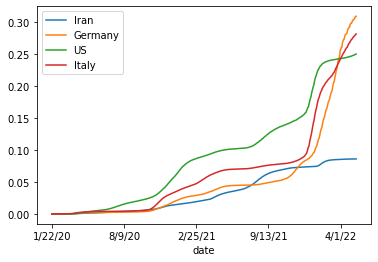

In [10]:

df_plot.set_index('date').plot()

In [11]:
for each in Country_list:
    Country_Population=max(pd_raw2[pd_raw2['Country_Region']==each].Population)
    df_plot3[each]=np.array(pd_raw3[pd_raw3['country']==each].iloc[:,2::].sum(axis=0)/Country_Population)
#df_plot3.head()  

"Vaccination rate (percentage of the population) over time" first view

<AxesSubplot:xlabel='date'>

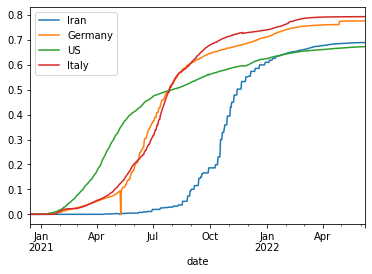

In [30]:
df_plot3.set_index('date').plot()

-------------------------------------------------------------------------------Saving Data--------------------------------------------

In [31]:
##

------------------------------------------------------------------------------Ploting (5.2)

In [36]:
df_plot['date']=df_plot.date.astype('datetime64[ns]')

In [38]:
fig=go.Figure()
for each in Country_list:
    #fig.add_trace(go.Scatter(x=df_plot.data,y=df_plot[each], name=each))
    fig.add_trace(go.Scatter(x=df_plot.date,
                           y=df_plot[each],
                          mode='markers+lines',
                          opacity=0.9,
                           line_width=2,
                          marker_size=4,
                          name=each))
fig.update_layout(width=1000, height=600,title="--- Navid Azadegan 421820 ---", xaxis_title="Time", yaxis_title="Relative Covid confirmed Cases(Source: John Hopkins csse)")
#fig.update_layout(xaxis_rangeslider_visible=True)
#fig.update_yaxis(type="log",range=[1.1,5.5])
#fig.show(renderer='Microsoft Edge')

In [39]:
import plotly.graph_objects as go
df_plot3['date']=df_plot3.date.astype('datetime64[ns]')

In [41]:
fig=go.Figure()
for each in Country_list:
        fig.add_trace(go.Scatter(x=df_plot3.date,
                           y=df_plot3[each],
                          mode='markers+lines',
                          opacity=0.9,
                           line_width=2,
                          marker_size=4,
                          name=each))
fig.update_layout(width=1000, height=600
                  ,title="--- Navid Azadegan ---"
                  , xaxis_title="Time"
                  , yaxis_title="Vaccin Dose (Source: John Hopkins csse)")

In [42]:
import dash
from dash import dcc
from dash import html
#import dash_core_components as dcc
#import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    html.Label('Multi-Select Country'),
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'Iran', 'value': 'Iran'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Italy', 'value': 'Italy'}
        ],
        value=['US', 'Germany'],
        multi=True
    ),


    dcc.Graph(figure=fig, id='main_window_slope')
])

In [43]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):

    traces = []
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                           y=df_plot[each],
                          mode='markers+lines',
                          opacity=0.9,
                           line_width=2,
                          marker_size=4,
                          name=each))



    return {
            'data': traces,
            'layout':dict (
                     width=1280,
                     height=720,
                     title="--- Navid Azadegan 421820 ---",
                     xaxis_title="Time", 
                     yaxis_title="Relative Covid confirmed Cases(Source: John Hopkins csse)")
                     
                         
                               
           
     }

In [ ]:
app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
